# Query CellxGene Census

Get the dataset id to download a source `.h5ad` file. 

## Preliminaries

### Import libraries

In [25]:
import cellxgene_census
import scanpy as sc

/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/mlange/mambaforge/envs/cell-annotator/lib/python3.12/site-p

## Query data

### Compile overview table

First, get an overview table with all datasets. 

In [10]:
census = cellxgene_census.open_soma()
census_datasets = census["census_info"]["datasets"].read().concat().to_pandas()

census_datasets = census_datasets.set_index("soma_joinid")
census_datasets.head()                                                             

The "stable" release is currently 2024-07-01. Specify 'census_version="2024-07-01"' in future calls to open_soma() to ensure data consistency.


,citation,collection_id,collection_name,collection_doi,dataset_id,dataset_version_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
soma_joinid,,,,,,,,,
0,Publication: https://doi.org/10.1002/hep4.1854...,44531dd9-1388-4416-a117-af0a99de2294,"Single-Cell, Single-Nucleus, and Spatial RNA S...",10.1002/hep4.1854,0895c838-e550-48a3-a777-dbcd35d30272,fb76c95f-0391-4fac-9fb9-082ce2430b59,Healthy human liver: B cells,0895c838-e550-48a3-a777-dbcd35d30272.h5ad,146
1,Publication: https://doi.org/10.1126/sciimmuno...,3a2af25b-2338-4266-aad3-aa8d07473f50,Single-cell analysis of human B cell maturatio...,10.1126/sciimmunol.abe6291,00ff600e-6e2e-4d76-846f-0eec4f0ae417,b6737a5e-9069-4dd6-9a57-92e17a746df9,Human tonsil nonlymphoid cells scRNA,00ff600e-6e2e-4d76-846f-0eec4f0ae417.h5ad,363
2,Publication: https://doi.org/10.1038/s41593-02...,180bff9c-c8a5-4539-b13b-ddbc00d643e6,Molecular characterization of selectively vuln...,10.1038/s41593-020-00764-7,bdacc907-7c26-419f-8808-969eab3ca2e8,0e02290f-b992-450b-8a19-554f73cd7f09,Molecular characterization of selectively vuln...,bdacc907-7c26-419f-8808-969eab3ca2e8.h5ad,3799
3,Publication: https://doi.org/10.1038/s41467-02...,bf325905-5e8e-42e3-933d-9a9053e9af80,Single-cell Atlas of common variable immunodef...,10.1038/s41467-022-29450-x,a5d95a42-0137-496f-8a60-101e17f263c8,40832710-d7b1-43fb-b2c2-1cd2255bc3ac,Steady-state B cells - scRNA-seq,a5d95a42-0137-496f-8a60-101e17f263c8.h5ad,1324
4,Publication: https://doi.org/10.1038/s41590-02...,93eebe82-d8c3-41bc-a906-63b5b5f24a9d,Single-cell proteo-genomic reference maps of t...,10.1038/s41590-021-01059-0,d3566d6a-a455-4a15-980f-45eb29114cab,eb6c070c-ff67-4c1f-8d4d-65f9fe2119ee,blood and bone marrow from a healthy young donor,d3566d6a-a455-4a15-980f-45eb29114cab.h5ad,15502


Filter by some keywords

In [32]:
mask = census_datasets["collection_name"].str.contains("pancreatic")
census_datasets.loc[mask]

,citation,collection_id,collection_name,collection_doi,dataset_id,dataset_version_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
soma_joinid,,,,,,,,,
150,Publication: https://doi.org/10.1016/j.molmet....,0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e,A transcriptional cross species map of pancrea...,10.1016/j.molmet.2022.101595,07f14e26-ff0d-43c4-bfe3-bf1a94dc73c3,6fd12ea3-d231-4f3c-af33-e3b19a25fec8,mouse pancreatic islet cells,07f14e26-ff0d-43c4-bfe3-bf1a94dc73c3.h5ad,7011
436,Publication: https://doi.org/10.1016/j.molmet....,0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e,A transcriptional cross species map of pancrea...,10.1016/j.molmet.2022.101595,78f10833-3e61-4fad-96c9-4bbd4f14bdfa,75852754-2d3d-4126-97fb-4514bb5fdebc,Cross species map of pancreatic alpha cells,78f10833-3e61-4fad-96c9-4bbd4f14bdfa.h5ad,11541
542,Publication: https://doi.org/10.1016/j.molmet....,0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e,A transcriptional cross species map of pancrea...,10.1016/j.molmet.2022.101595,9c4c8515-8f82-4c72-b0c6-f87647b00bbe,ba5e1ea8-dedd-4a3f-92ec-ab649126f6ab,Cross species map of pancreatic beta cells,9c4c8515-8f82-4c72-b0c6-f87647b00bbe.h5ad,11923
583,Publication: https://doi.org/10.1038/s42255-02...,51544e44-293b-4c2b-8c26-560678423380,Multiomics single-cell analysis of human pancr...,10.1038/s42255-022-00531-x,37b21763-7f0f-41ae-9001-60bad6e2841d,0f2c1200-7bcd-4d5b-b029-4fcd7686433b,Multiomics single-cell analysis of human pancr...,37b21763-7f0f-41ae-9001-60bad6e2841d.h5ad,69645
638,Publication: https://doi.org/10.1016/j.molmet....,0a77d4c0-d5d0-40f0-aa1a-5e1429bcbd7e,A transcriptional cross species map of pancrea...,10.1016/j.molmet.2022.101595,3294d050-6eeb-4a00-b24c-71aacc9b777f,6e5e3d17-2385-468c-8461-b5f3ffd74217,Human pancreatic islet cells,3294d050-6eeb-4a00-b24c-71aacc9b777f.h5ad,26474
751,Publication: https://doi.org/10.1101/2022.12.2...,296237e2-393d-4e31-b590-b03f74ac5070,Mouse pancreatic islet scRNA-seq atlas across ...,10.1101/2022.12.22.521557,49e4ffcc-5444-406d-bdee-577127404ba8,18311edf-72b9-48c8-9e2b-53f958e77c83,Mouse pancreatic islet scRNA-seq atlas across ...,49e4ffcc-5444-406d-bdee-577127404ba8.h5ad,301796


### Download source data

Next, we can download a specific dataset using the `dataset_id`. 

In [24]:
cellxgene_census.download_source_h5ad(
    "07f14e26-ff0d-43c4-bfe3-bf1a94dc73c3", to_path="data/pancreas.h5ad"
)

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████| 80.9M/80.9M [04:51<00:00, 291kB/s]


In [27]:
adata = sc.read_h5ad("data/pancreas.h5ad")
adata

AnnData object with n_obs × n_vars = 7011 × 27255
    obs: 'mt_frac', 'n_counts', 'n_genes', 'treatment', 'doublet_score', 'louvain_anno_broad', 'louvain_anno_fine', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

### Inspect source data

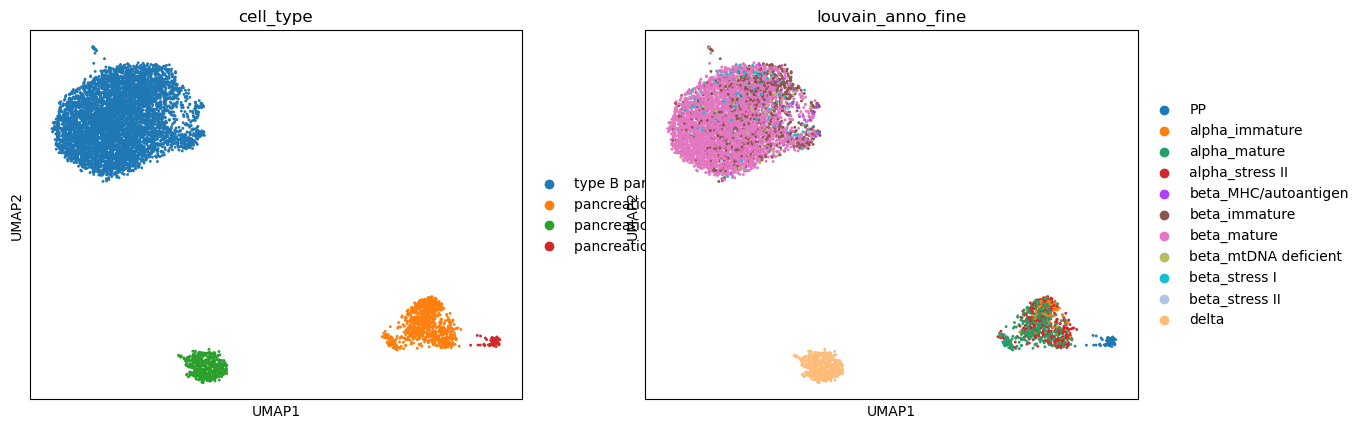

In [31]:
sc.pl.embedding(adata, basis="umap", color=["cell_type", "louvain_anno_fine"])

That's a bit boring, but oh well. 